In [1]:
import numpy as np

dataset_train = np.genfromtxt('A2Q2train.csv', delimiter=',')

In [2]:
dataset_train.shape

(10000, 101)

## without Bias

In [3]:
X = dataset_train[:, :-1].T
y = dataset_train[:, -1]
X.shape, y.shape

((100, 10000), (10000,))

In [4]:
w_ML_wo_bias = np.linalg.inv(X @ X.T) @ X @ y

In [5]:
w_ML_wo_bias.shape

(100,)

In [6]:
error_wo_bias = np.mean((y - w_ML_wo_bias.T @ X) ** 2)
error_wo_bias

np.float64(0.03968644186213123)

## with Bias

In [7]:
X_b = np.vstack((np.ones((1, X.shape[1])), X))
X_b.shape

(101, 10000)

In [8]:
w_ML_w_bias = np.linalg.inv(X_b @ X_b.T) @ X_b @ y
print(w_ML_w_bias.shape)
error_w_bias = np.mean((y - w_ML_w_bias.T @ X_b) ** 2)
print(error_w_bias)

(101,)
0.039685210868200226


In [9]:
for i in range(100):
    print(f"Weight {i}: without bias = {w_ML_wo_bias[i]}, with bias = {w_ML_w_bias[i+1]}")

Weight 0: without bias = -0.007849610084459335, with bias = -0.008228574310631988
Weight 1: without bias = -0.013671531994035712, with bias = -0.014073508127165683
Weight 2: without bias = -0.0036165643768049163, with bias = -0.004029427669883151
Weight 3: without bias = 0.002649091619741785, with bias = 0.0023122004867955973
Weight 4: without bias = 0.18855144605269003, with bias = 0.1881571244493383
Weight 5: without bias = 0.0026531465683411956, with bias = 0.002238200686131571
Weight 6: without bias = 0.009465317866479604, with bias = 0.009118227738294515
Weight 7: without bias = 0.17980948151078008, with bias = 0.17943243002239312
Weight 8: without bias = 0.003737573170149694, with bias = 0.0033288496756185906
Weight 9: without bias = 0.4996089435657779, with bias = 0.49925066644912014
Weight 10: without bias = 0.008358362641620588, with bias = 0.007986284088100662
Weight 11: without bias = 0.004291087754421122, with bias = 0.003946896766892177
Weight 12: without bias = 0.01421411

In [10]:
cosine_sim = (w_ML_wo_bias @ w_ML_w_bias[1:]) / (np.linalg.norm(w_ML_wo_bias) * np.linalg.norm(w_ML_w_bias[1:]))
cosine_sim

np.float64(0.9999973781702483)

So, might as well do without bias. 
ie. Fit Line that passes through origin

## Gradient Descent

In [11]:
np.random.seed(42)

In [12]:
w_init = np.random.randn(X.shape[0])

In [13]:
w = w_init.copy()
learning_rate = 0.02
distances_gd = []
distances_gd.append(np.linalg.norm(w - w_ML_wo_bias))
for i in range(5000):
    gradient = 2 * X @ (X.T @ w - y) / X.shape[1]
    w -= learning_rate * gradient
    distances_gd.append(np.linalg.norm(w - w_ML_wo_bias))

Text(0.5, 1.0, 'Gradient Descent Convergence')

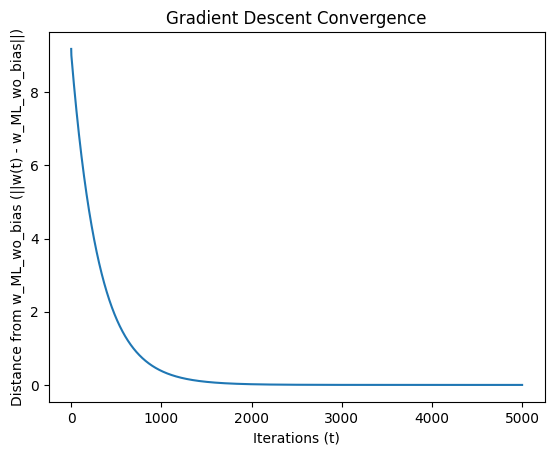

In [14]:
import matplotlib.pyplot as plt

plt.plot(distances_gd)
plt.xlabel('Iterations (t)')
plt.ylabel('Distance from w_ML_wo_bias (||w(t) - w_ML_wo_bias||)')
plt.title('Gradient Descent Convergence')

In [15]:
distances_gd[-10:]

[np.float64(3.737121869923336e-06),
 np.float64(3.726646724203191e-06),
 np.float64(3.7162009971071194e-06),
 np.float64(3.7057846058067575e-06),
 np.float64(3.6953974677076956e-06),
 np.float64(3.6850395004824463e-06),
 np.float64(3.674710622017956e-06),
 np.float64(3.6644107504312912e-06),
 np.float64(3.654139804087462e-06),
 np.float64(3.6438977015657024e-06)]

In [16]:
w

array([-7.84932614e-03, -1.36716146e-02, -3.61602802e-03,  2.64952762e-03,
        1.88551878e-01,  2.65304079e-03,  9.46592406e-03,  1.79810329e-01,
        3.73733389e-03,  4.99609533e-01,  8.35825893e-03,  4.29069389e-03,
        1.42144642e-02,  3.94186313e-03,  9.36762906e-03, -1.12101991e-03,
        3.35635874e-03,  1.16076776e-03, -9.40949533e-03, -2.45661070e-03,
       -1.17408608e-02, -1.01962158e-02,  7.95775377e-03, -1.00575504e-02,
        6.04858044e-03, -4.67362896e-03, -3.09073530e-03,  8.14936504e-03,
        1.20264312e-02, -6.82499701e-03, -8.65411412e-03,  9.87426162e-04,
        4.92955604e-03,  5.99761021e-03, -1.34665558e-02,  1.07034144e-03,
        1.32743999e-02, -1.14153153e-02, -2.01055661e-02,  5.85095733e-01,
        4.95170212e-04, -7.86467180e-04, -2.71905471e-03, -9.54021896e-03,
       -5.44190607e-03,  9.80682514e-03, -6.72539491e-03, -4.45363158e-04,
        6.98486246e-03,  3.16133359e-02,  4.51764050e-01, -8.75168646e-03,
        2.55172286e-03,  

In [17]:
w_ML_wo_bias

array([-7.84961008e-03, -1.36715320e-02, -3.61656438e-03,  2.64909162e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531787e-03,  1.79809482e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836264e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727498e-03,  1.16152213e-03, -9.40884704e-03, -2.45575474e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771320e-03, -1.00574853e-02,
        6.04882939e-03, -4.67345193e-03, -3.09091547e-03,  8.14909191e-03,
        1.20264599e-02, -6.82458167e-03, -8.65405539e-03,  9.86273489e-04,
        4.92968012e-03,  5.99772460e-03, -1.34667859e-02,  1.07075730e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483255e-04, -7.86666916e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161059e-03,  9.80679209e-03, -6.72540624e-03, -4.45414300e-04,
        6.98516510e-03,  3.16138907e-02,  4.51763485e-01, -8.75221378e-03,
        2.55167390e-03,  

In [18]:
error_gradient_descent = np.mean((y - w.T @ X) ** 2)
error_gradient_descent

np.float64(0.03968644186306164)

In [19]:
cosine_sim_gd = (w @ w_ML_wo_bias) / (np.linalg.norm(w) * np.linalg.norm(w_ML_wo_bias))
cosine_sim_gd

np.float64(0.9999999999975125)

## Stochastic Gradient Descent

In [20]:
w = w_init.copy()
learning_rate = 0.02
distances_sgd = []
distances_sgd.append(np.linalg.norm(w - w_ML_wo_bias))

total_samples = X.shape[1]
batch_size = 100

for i in range(5000):
    column_indices = np.random.choice(total_samples, batch_size, replace=False)
    X_batch = X[:, column_indices]
    y_batch = y[column_indices]
    gradient = 2 * X_batch @ (X_batch.T @ w - y_batch) / X_batch.shape[1]
    w -= learning_rate * gradient
    distances_sgd.append(np.linalg.norm(w - w_ML_wo_bias))

Text(0.5, 1.0, 'Stochastic Gradient Descent Convergence')

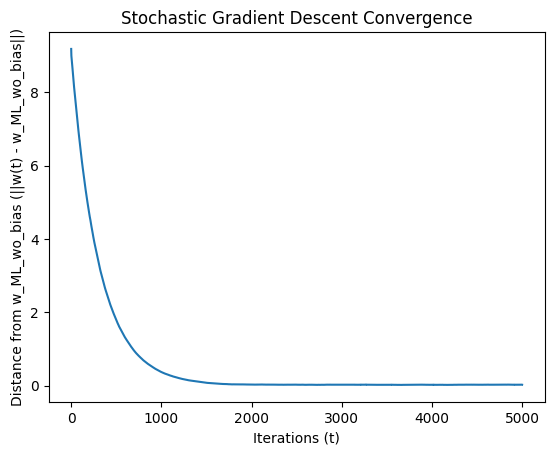

In [21]:
plt.plot(distances_sgd)
plt.xlabel('Iterations (t)')
plt.ylabel('Distance from w_ML_wo_bias (||w(t) - w_ML_wo_bias||)')
plt.title('Stochastic Gradient Descent Convergence')

In [22]:
w

array([-8.18548046e-03, -9.28350542e-03, -3.06890973e-03,  7.52871258e-03,
        1.89909052e-01,  3.37621347e-03,  6.70481481e-03,  1.78050209e-01,
        5.35889889e-03,  5.04951125e-01,  1.08955350e-02,  3.17522906e-03,
        8.66397876e-03,  7.62608286e-03,  6.44626957e-03, -3.48873308e-03,
        1.78809645e-03,  2.85379311e-03, -9.75612976e-03, -5.98100614e-03,
       -1.29326845e-02, -1.03605057e-02,  7.55504927e-03, -7.16714000e-03,
        3.72698447e-04, -5.59797949e-03, -2.49354288e-04,  1.22996039e-02,
        1.45415520e-02, -1.06202182e-02, -4.78074310e-03, -4.22428398e-03,
        8.39139103e-03,  5.60575693e-03, -1.46609995e-02,  4.19967755e-03,
        1.09071598e-02, -1.17584858e-02, -2.22250581e-02,  5.84271763e-01,
       -1.32869398e-03, -9.96262624e-04, -5.04523705e-03, -1.13149644e-02,
       -6.66643655e-03,  1.21984528e-02, -4.79655317e-03, -2.92314004e-03,
        8.15945155e-03,  2.89051548e-02,  4.51667925e-01, -9.33213312e-03,
        1.32954521e-03,  

In [23]:
w_ML_wo_bias

array([-7.84961008e-03, -1.36715320e-02, -3.61656438e-03,  2.64909162e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531787e-03,  1.79809482e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836264e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727498e-03,  1.16152213e-03, -9.40884704e-03, -2.45575474e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771320e-03, -1.00574853e-02,
        6.04882939e-03, -4.67345193e-03, -3.09091547e-03,  8.14909191e-03,
        1.20264599e-02, -6.82458167e-03, -8.65405539e-03,  9.86273489e-04,
        4.92968012e-03,  5.99772460e-03, -1.34667859e-02,  1.07075730e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483255e-04, -7.86666916e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161059e-03,  9.80679209e-03, -6.72540624e-03, -4.45414300e-04,
        6.98516510e-03,  3.16138907e-02,  4.51763485e-01, -8.75221378e-03,
        2.55167390e-03,  

In [24]:
error_stochastic_gradient_descent = np.mean((y - w.T @ X) ** 2)
error_stochastic_gradient_descent

np.float64(0.03975485404411303)

In [25]:
cosine_sim_sgd = (w @ w_ML_wo_bias) / (np.linalg.norm(w) * np.linalg.norm(w_ML_wo_bias))
cosine_sim_sgd

np.float64(0.9998477860943157)

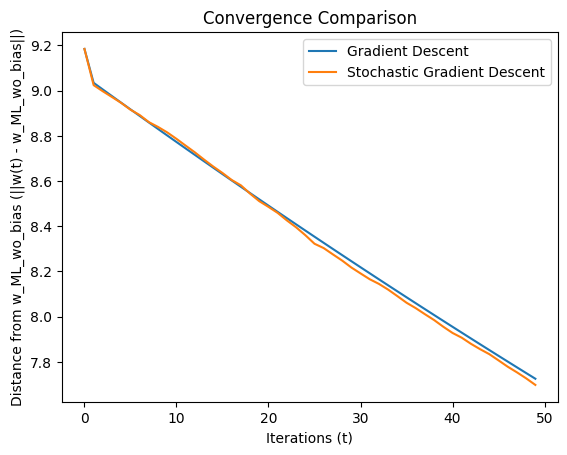

In [ ]:
plt.plot(distances_gd[:50], label='Gradient Descent')
plt.plot(distances_sgd[:50], label='Stochastic Gradient Descent')
plt.xlabel('Iterations (t)')
plt.ylabel('Distance from w_ML_wo_bias (||w(t) - w_ML_wo_bias||)')
plt.title('Convergence Comparison (start)')
plt.legend()


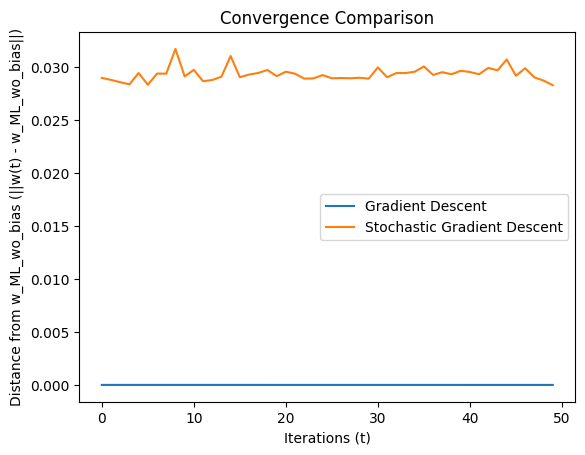

In [ ]:
plt.plot(distances_gd[-50:], label='Gradient Descent')
plt.plot(distances_sgd[-50:], label='Stochastic Gradient Descent')
plt.xlabel('Iterations (t)')
plt.ylabel('Distance from w_ML_wo_bias (||w(t) - w_ML_wo_bias||)')
plt.title('Convergence Comparison (end)')
plt.legend()


# Ridge Regression

In [29]:
val_cols = np.random.choice(X.shape[1], 200, replace=False)

In [30]:
X_train = np.delete(X, val_cols, axis=1)
X_val = X[:, val_cols]
y_train = np.delete(y, val_cols, axis=0)
y_val = y[val_cols]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((100, 9800), (100, 200), (9800,), (200,))

In [31]:
from tqdm import tqdm

In [32]:
lambda_coeffs = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
val_errors = {}
w_from_ridge = {}
for lambda_coeff in tqdm(lambda_coeffs):
    w = w_init.copy()
    learning_rate = 0.02
    for i in range(5000):
        gradient = 2 * X_train @ (X_train.T @ w - y_train) / X_train.shape[1] + lambda_coeff*w
        w -= learning_rate * gradient
    val_error = np.mean((y_val - w.T @ X_val) ** 2)
    val_errors[str(lambda_coeff)] = val_error
    w_from_ridge[str(lambda_coeff)] = w


100%|██████████| 7/7 [00:16<00:00,  2.39s/it]


In [33]:
val_errors

{'0.001': np.float64(0.03859565684608574),
 '0.002': np.float64(0.038471797342206),
 '0.005': np.float64(0.0381736203432074),
 '0.01': np.float64(0.03789718126364909),
 '0.02': np.float64(0.03801796585480601),
 '0.05': np.float64(0.04168913233893247),
 '0.1': np.float64(0.051887212415572745)}

Text(0.5, 1.0, 'Ridge Regression Validation Errors')

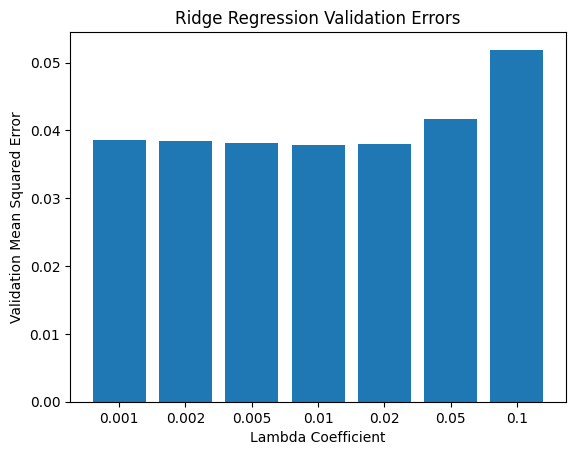

In [34]:
plt.bar(val_errors.keys(), val_errors.values())
plt.xlabel('Lambda Coefficient')
plt.ylabel('Validation Mean Squared Error')
plt.title('Ridge Regression Validation Errors')

In [35]:
w_from_ridge['0.01']

array([-4.32766423e-03, -1.10174923e-02, -1.22022084e-03,  4.52865467e-03,
        1.79080497e-01,  3.85947741e-03,  1.13662694e-02,  1.71788009e-01,
        5.88210958e-03,  4.75030793e-01,  9.71005360e-03,  7.47672517e-03,
        1.74971422e-02,  7.08247487e-03,  1.22021038e-02,  1.09562791e-04,
        6.46979831e-03,  4.61184706e-03, -6.33502132e-03,  1.32774950e-03,
       -1.03798426e-02, -7.50199431e-03,  8.84137840e-03, -5.79558603e-03,
        8.97704642e-03, -1.90583933e-03, -7.29792386e-04,  7.56181208e-03,
        1.21065070e-02, -3.98122086e-03, -6.40449901e-03,  2.36195544e-03,
        9.83233451e-03,  7.33911117e-03, -8.71050500e-03,  2.04847156e-03,
        1.77502181e-02, -7.22118963e-03, -1.96692694e-02,  5.54690447e-01,
        2.18036464e-03,  2.76687355e-03,  1.06146994e-03, -6.91875581e-03,
       -3.68786115e-03,  9.31389724e-03, -5.97534965e-03,  1.65148628e-03,
        8.17698558e-03,  3.10512345e-02,  4.28965996e-01, -5.83759352e-03,
        5.79954200e-03,  

In [36]:
w_ML_wo_bias

array([-7.84961008e-03, -1.36715320e-02, -3.61656438e-03,  2.64909162e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531787e-03,  1.79809482e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836264e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727498e-03,  1.16152213e-03, -9.40884704e-03, -2.45575474e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771320e-03, -1.00574853e-02,
        6.04882939e-03, -4.67345193e-03, -3.09091547e-03,  8.14909191e-03,
        1.20264599e-02, -6.82458167e-03, -8.65405539e-03,  9.86273489e-04,
        4.92968012e-03,  5.99772460e-03, -1.34667859e-02,  1.07075730e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483255e-04, -7.86666916e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161059e-03,  9.80679209e-03, -6.72540624e-03, -4.45414300e-04,
        6.98516510e-03,  3.16138907e-02,  4.51763485e-01, -8.75221378e-03,
        2.55167390e-03,  

## Testing

In [37]:
dataset_test = np.genfromtxt('A2Q2test.csv', delimiter=',')

dataset_test.shape

(500, 101)

In [38]:
X_test = dataset_test[:, :-1].T
y_test = dataset_test[:, -1]
X_test.shape, y_test.shape

((100, 500), (500,))

In [39]:
error_ML_wo_bias = np.mean((y_test - w_ML_wo_bias.T @ X_test) ** 2)
error_ridge = np.mean((y_test - w_from_ridge['0.01'].T @ X_test) ** 2)

error_ML_wo_bias, error_ridge

(np.float64(0.37072731116921526), np.float64(0.3519205403712121))